In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data =pd.read_csv("/content/logistic_regression.csv")

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
data.iloc[:,:14]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation


In [ ]:
data.iloc[:,14:]

,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
data.shape

(396030, 27)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)

In [ ]:
data['emp_length']

0         10.0
1          4.0
2          1.0
3          6.0
4          9.0
          ... 
396025     2.0
396026     5.0
396027    10.0
396028    10.0
396029    10.0
Name: emp_length, Length: 396030, dtype: float64

In [ ]:
data['term'] = data['term'].apply(lambda x: int(x.split()[0]))

In [ ]:
data['term'].value_counts()

term
36    302005
60     94025
Name: count, dtype: int64

In [ ]:
data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

In [ ]:
data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].median(), inplace=True)

In [ ]:
data['issue_d'].value_counts().sort_values(ascending=False).head(10)

issue_d
Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
Jul-2015    10270
Oct-2013    10047
Jan-2014     9705
Apr-2015     9470
Sep-2013     9179
Name: count, dtype: int64

In [ ]:
data['grade'].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [ ]:
data['sub_grade'].value_counts()

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

In [ ]:
data['address'].value_counts()

address
USCGC Smith\r\nFPO AE 70466                           8
USS Johnson\r\nFPO AE 48052                           8
USNS Johnson\r\nFPO AE 05113                          8
USS Smith\r\nFPO AP 70466                             8
USNS Johnson\r\nFPO AP 48052                          7
                                                     ..
455 Tricia Cove\r\nAustinbury, FL 00813               1
7776 Flores Fall\r\nFernandezshire, UT 05113          1
6577 Mia Harbors Apt. 171\r\nRobertshire, OK 22690    1
8141 Cox Greens Suite 186\r\nMadisonstad, VT 05113    1
787 Michelle Causeway\r\nBriannaton, AR 48052         1
Name: count, Length: 393700, dtype: int64

In [ ]:
data['emp_title'].value_counts().sort_values(ascending=False).head(10)

emp_title
Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Sales               1638
Project Manager     1505
Owner               1410
Driver              1339
Office Manager      1218
Name: count, dtype: int64

In [ ]:
categorical_cols = ['term', 'grade', 'sub_grade','emp_title','home_ownership',
                    'verification_status', 'loan_status', 'purpose', 'title',
                    'initial_list_status', 'application_type']

In [ ]:
data[categorical_cols] = data[categorical_cols].astype('category')

In [ ]:
continuous_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc',
                   'dti', 'revol_bal', 'revol_util', 'total_acc', 'open_acc']

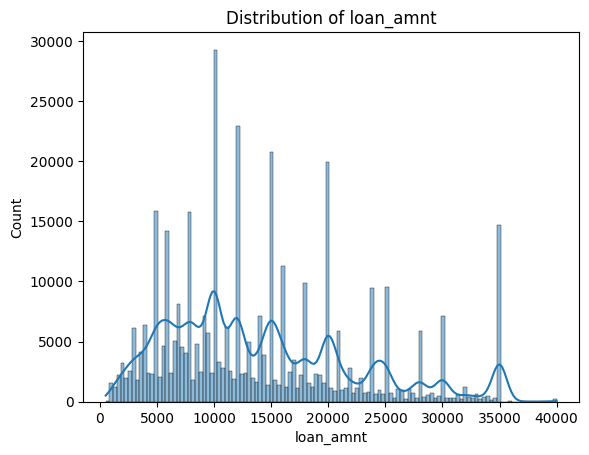

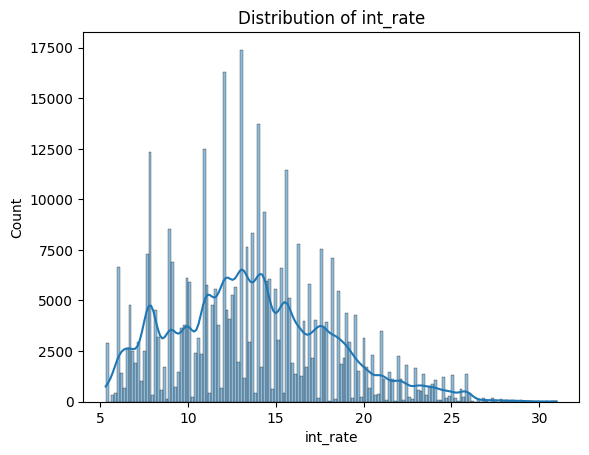

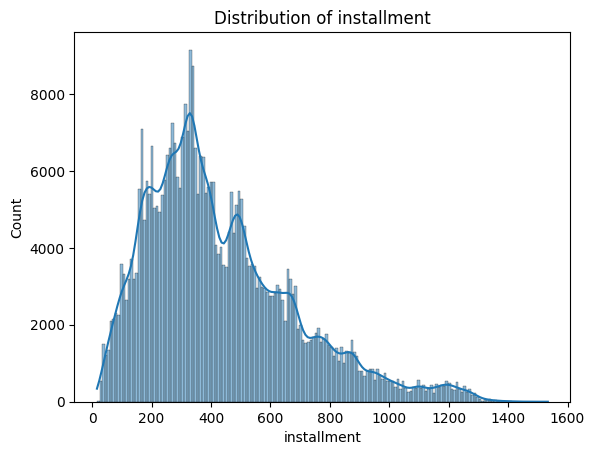

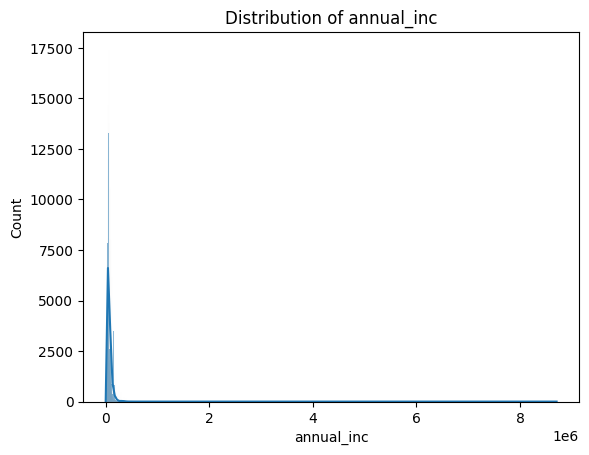

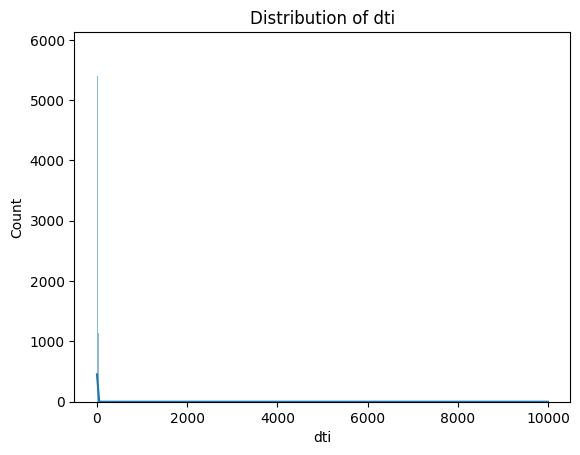

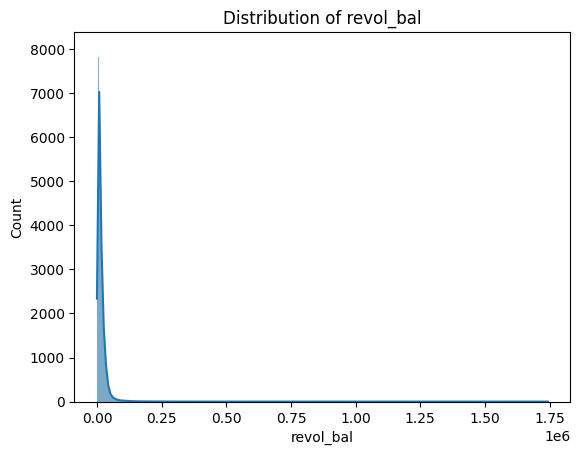

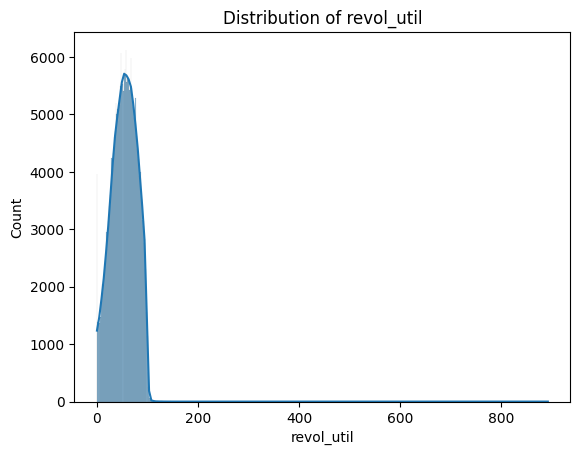

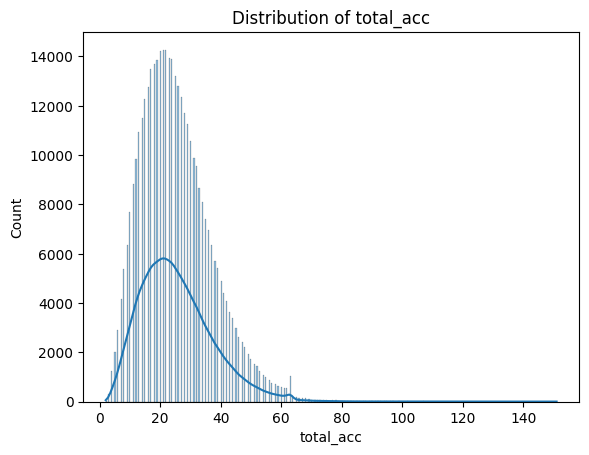

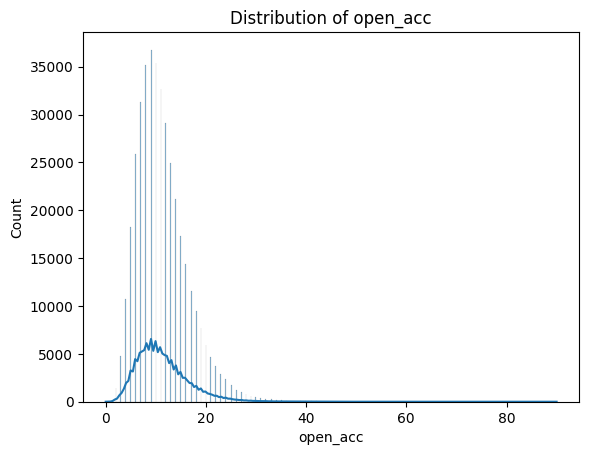

In [ ]:
for col in continuous_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

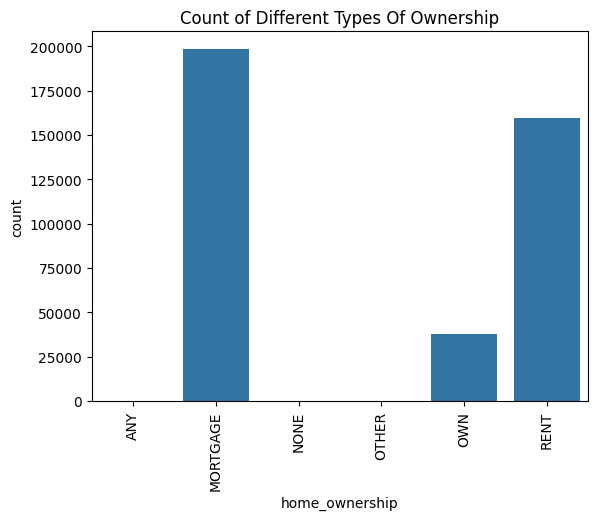

In [ ]:
sns.countplot(data=data, x = 'home_ownership')
plt.title('Count of Different Types Of Ownership')
plt.xticks(rotation=90)
plt.show()

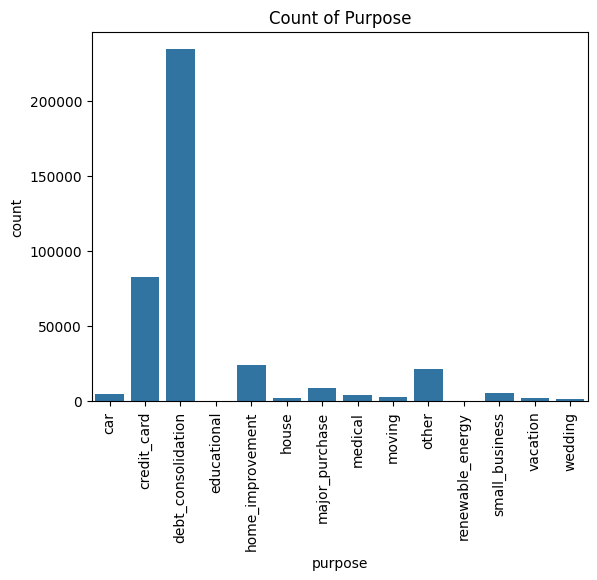

In [ ]:
sns.countplot(data=data, x = 'purpose')
plt.title('Count of Purpose')
plt.xticks(rotation=90)
plt.show()

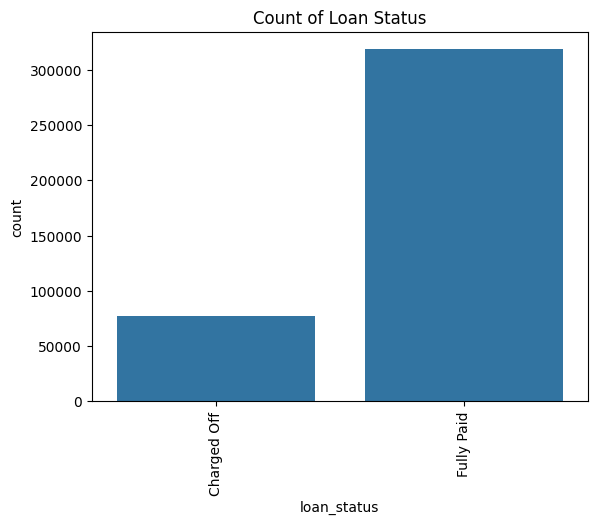

In [ ]:
sns.countplot(data=data, x = 'loan_status')
plt.title('Count of Loan Status')
plt.xticks(rotation=90)
plt.show()

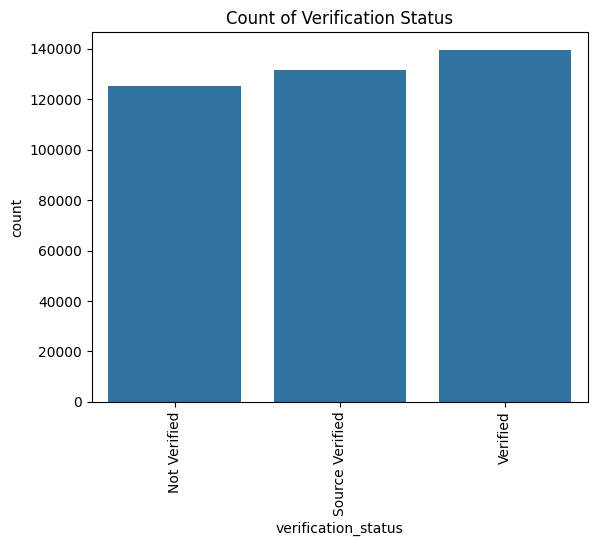

In [ ]:
sns.countplot(data=data, x = 'verification_status')
plt.title('Count of Verification Status')
plt.xticks(rotation=90)
plt.show()

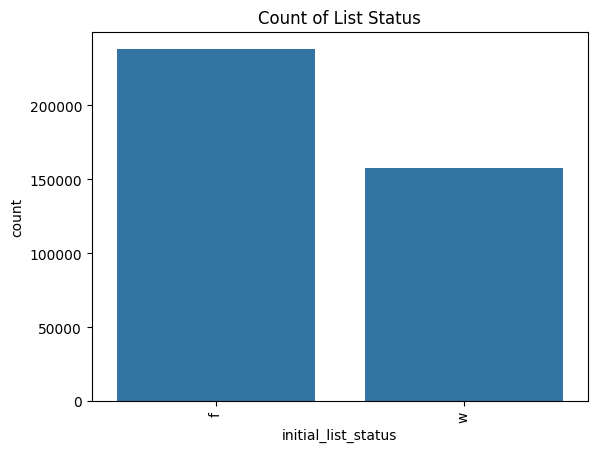

In [ ]:
sns.countplot(data=data, x = 'initial_list_status')
plt.title('Count of List Status')
plt.xticks(rotation=90)
plt.show()

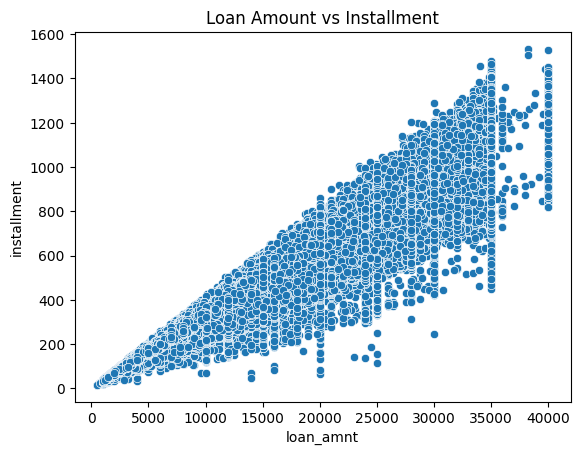

In [ ]:
sns.scatterplot(x='loan_amnt', y='installment', data=data)
plt.title('Loan Amount vs Installment')
plt.show()

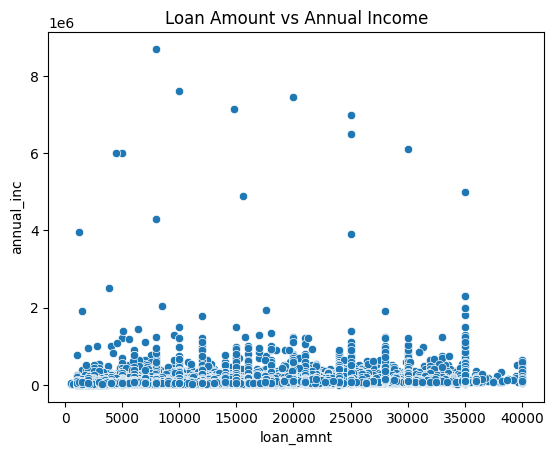

In [ ]:
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data)
plt.title('Loan Amount vs Annual Income')
plt.show()

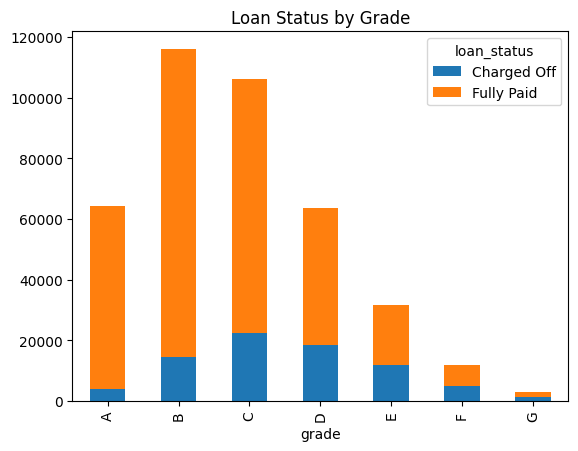

In [ ]:
pd.crosstab(data['grade'], data['loan_status']).plot(kind='bar', stacked=True)
plt.title('Loan Status by Grade')
plt.show()

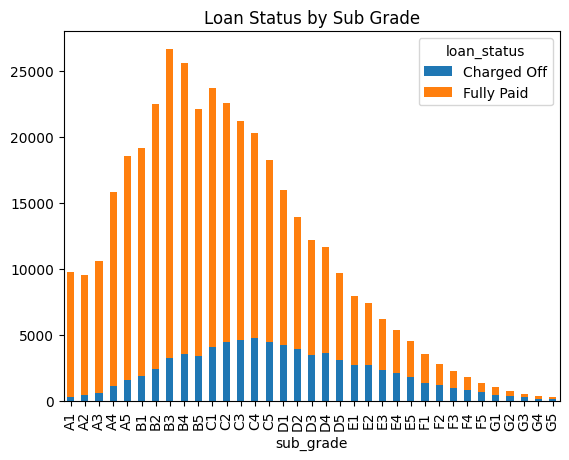

In [ ]:
pd.crosstab(data['sub_grade'], data['loan_status']).plot(kind='bar', stacked=True)
plt.title('Loan Status by Sub Grade')
plt.show()

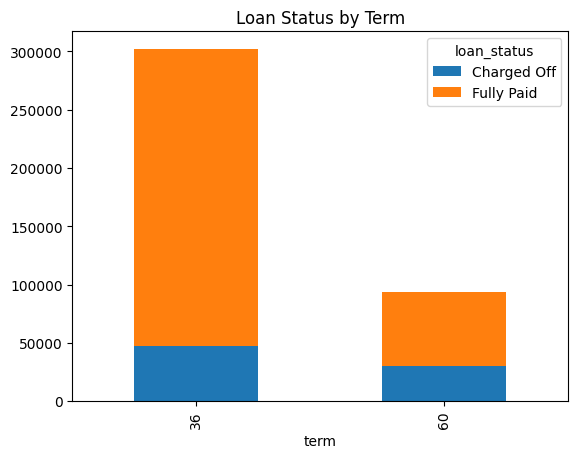

In [ ]:
pd.crosstab(data['term'], data['loan_status']).plot(kind='bar', stacked=True)
plt.title('Loan Status by Term')
plt.show()

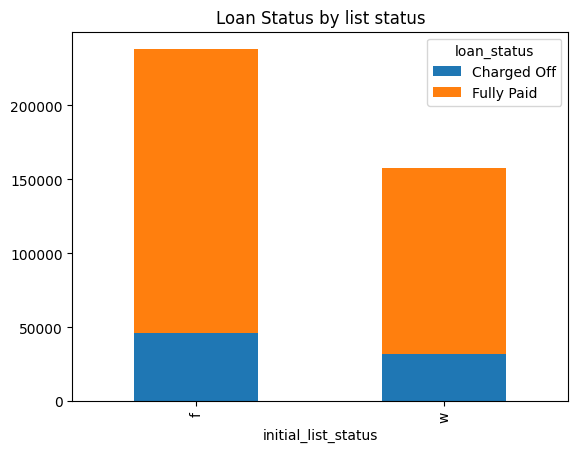

In [ ]:
pd.crosstab(data['initial_list_status'], data['loan_status']).plot(kind='bar', stacked=True)
plt.title('Loan Status by list status')
plt.show()

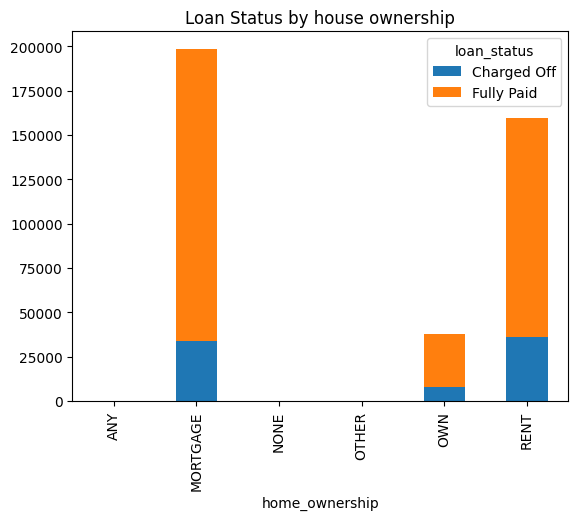

In [ ]:
pd.crosstab(data['home_ownership'], data['loan_status']).plot(kind='bar', stacked=True)
plt.title('Loan Status by house ownership')
plt.show()

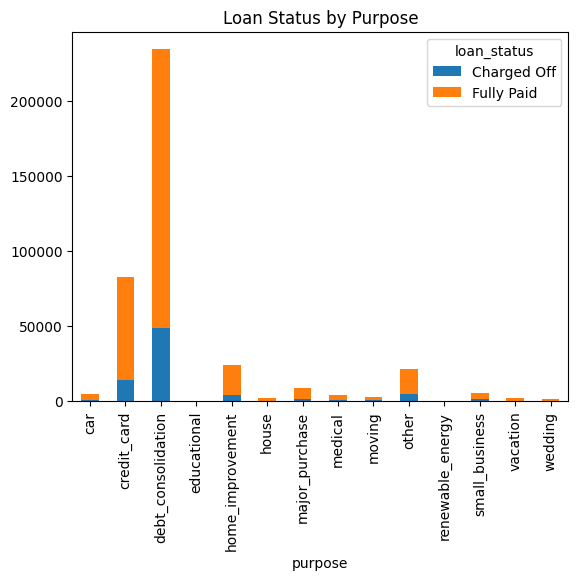

In [ ]:
pd.crosstab(data['purpose'], data['loan_status']).plot(kind='bar', stacked=True)
plt.title('Loan Status by Purpose')
plt.show()

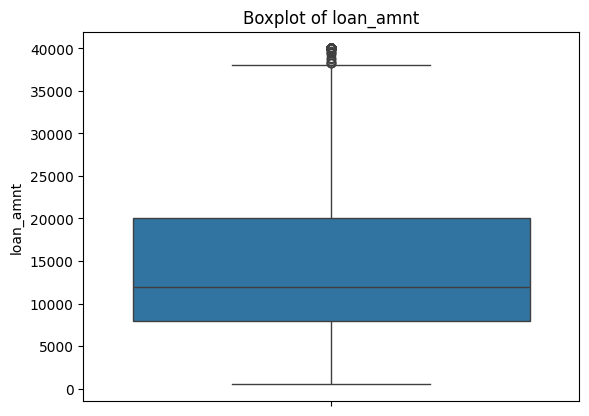

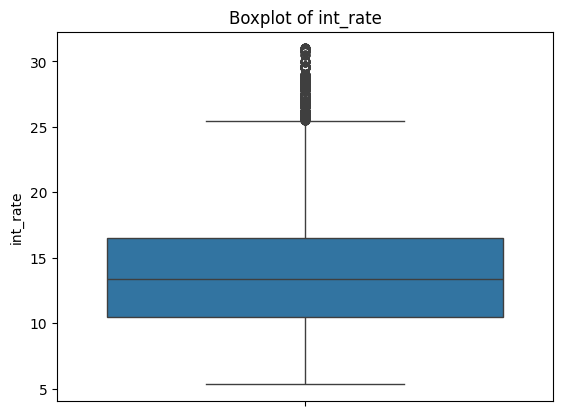

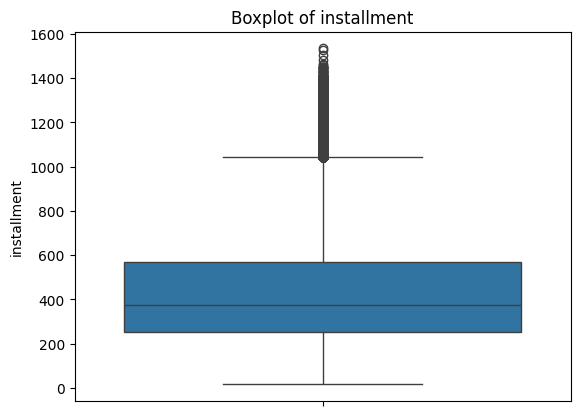

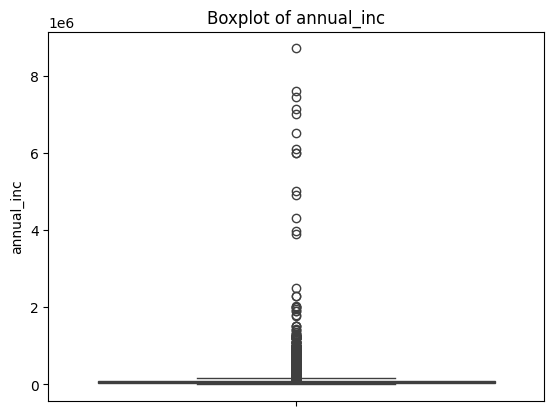

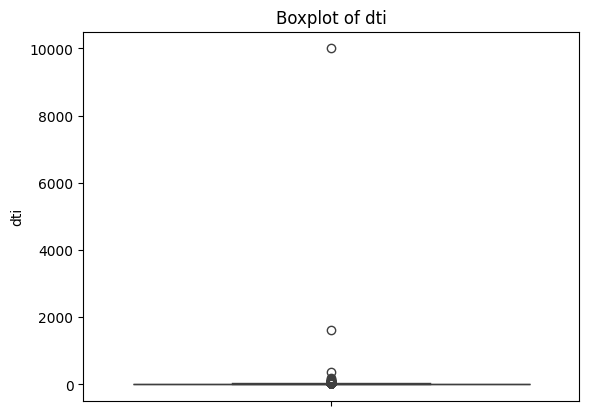

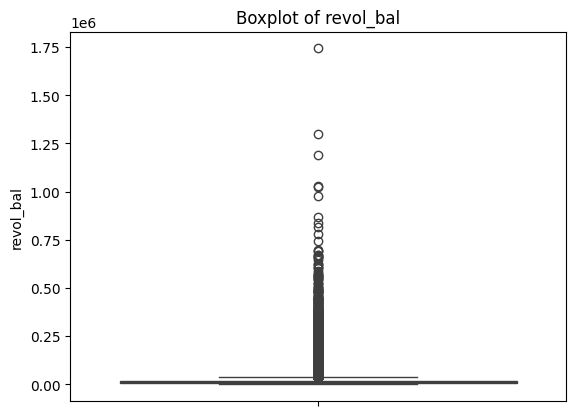

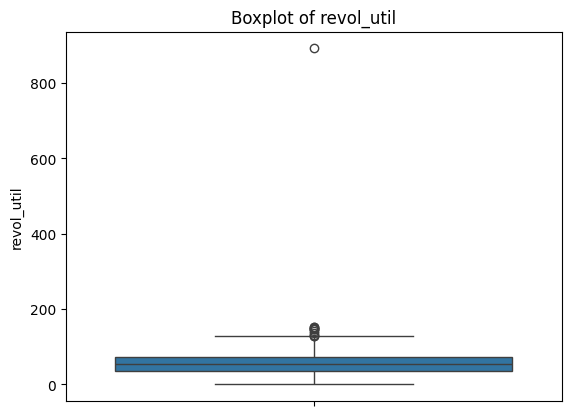

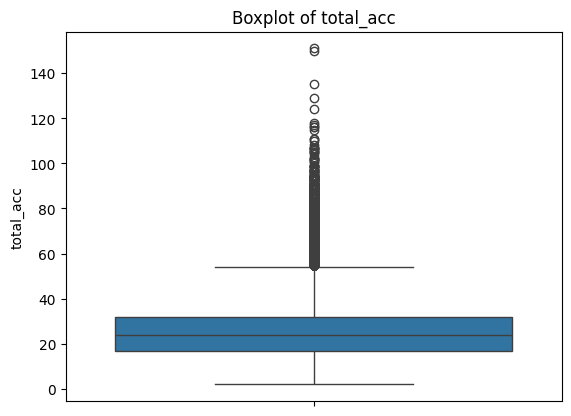

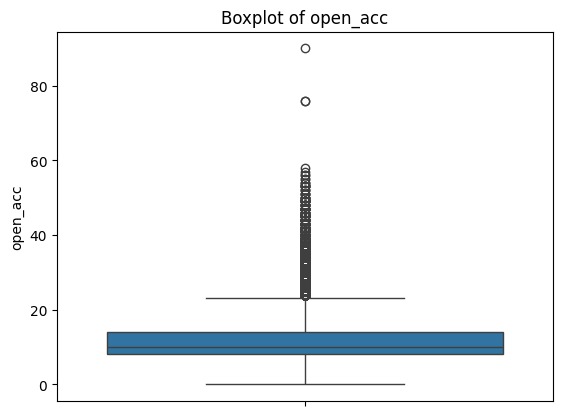

In [ ]:
for col in continuous_cols:
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
for col in continuous_cols:
    skewness = data[col].skew()
    print(f'Skewness of {col}: {skewness}')

Skewness of loan_amnt: 0.777285467097746
Skewness of int_rate: 0.4206694719582165
Skewness of installment: 0.983598160890438
Skewness of annual_inc: 41.042724746560665
Skewness of dti: 431.05122535490415
Skewness of revol_bal: 11.727515124126919
Skewness of revol_util: -0.07177802032853098
Skewness of total_acc: 0.8643276369429
Skewness of open_acc: 1.2130188444585455


In [ ]:
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


In [ ]:
missing_values = data.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')

Missing values in each column:
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies        0
address                     0
dtype: int64


In [ ]:
for col in continuous_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [ ]:
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [ ]:
for col in continuous_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [ ]:
data['issue_year'] = pd.to_datetime(data['issue_d']).dt.year
data['issue_month'] = pd.to_datetime(data['issue_d']).dt.month

<ipython-input-48-2a56a1035413>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_year'] = pd.to_datetime(data['issue_d']).dt.year
<ipython-input-48-2a56a1035413>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_month'] = pd.to_datetime(data['issue_d']).dt.month


In [ ]:
data['issue_year']

0         2015
1         2015
2         2015
3         2014
4         2013
          ... 
396025    2015
396026    2015
396027    2013
396028    2012
396029    2010
Name: issue_year, Length: 396030, dtype: int32

In [ ]:
data['issue_month']

0          1
1          1
2          1
3         11
4          4
          ..
396025    10
396026     2
396027    10
396028     8
396029     6
Name: issue_month, Length: 396030, dtype: int32

In [ ]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies        0
address                     0
issue_year                  0
issue_month                 0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(340990, 29)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = data[continuous_cols].dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [ ]:
print(vif_data)

       feature        VIF
0    loan_amnt  53.092099
1     int_rate  10.249495
2  installment  54.688791
3   annual_inc   8.090574
4          dti   7.508730
5    revol_bal   5.255610
6   revol_util   8.406589
7    total_acc  11.885775
8     open_acc  13.867602


In [ ]:
data1 = data

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()
data[continuous_cols] = scaler.fit_transform(data[continuous_cols])

In [ ]:
data.shape

(340990, 29)

In [ ]:
categorical_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'initial_list_status',
 'application_type']

In [ ]:
categorical_cols1 = ['grade','home_ownership',
                    'loan_status', 'purpose', 'application_type',
                    'verification_status']

In [ ]:
data.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length','initial_list_status'],
                   axis=1, inplace=True)

In [ ]:
data = pd.get_dummies(data, columns=categorical_cols1, drop_first=True, sparse=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X = data.drop('loan_status_Fully Paid', axis=1)
y = data['loan_status_Fully Paid']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
model = LogisticRegression(**best_params, max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
model_sm = LogisticRegression(max_iter=1000)
model_sm.fit(X_train_sm, y_train_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
coefficients = pd.DataFrame(model_sm.coef_.flatten(), X.columns, columns=['Coefficient'])
print(coefficients)

                                     Coefficient
loan_amnt                               0.042958
term                                   -0.022816
int_rate                               -0.023139
installment                            -0.067158
annual_inc                              0.230405
dti                                    -0.174217
open_acc                               -0.244961
pub_rec                                 0.035867
revol_bal                               0.049600
revol_util                             -0.137602
total_acc                               0.247851
mort_acc                                0.021880
pub_rec_bankruptcies                    0.196952
issue_year                              0.003716
issue_month                             0.026668
grade_B                                -1.050485
grade_C                                -1.438873
grade_D                                -1.586269
grade_E                                -1.830197
grade_F             

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


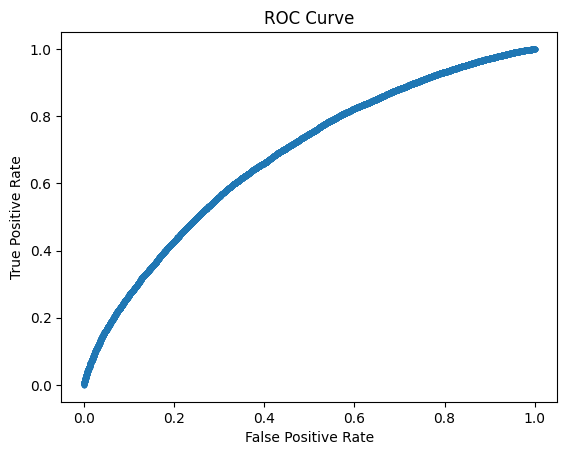

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

y_pred_prob = model_sm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

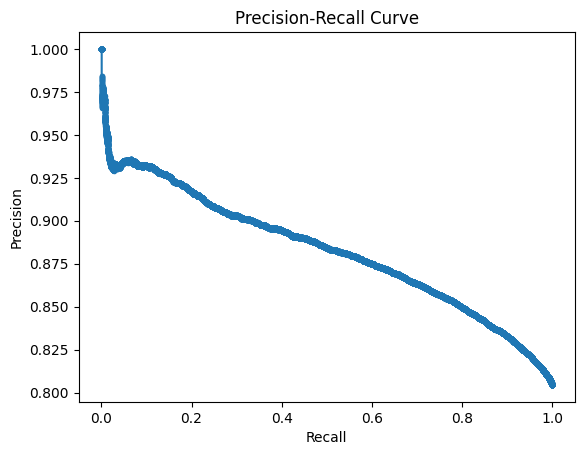

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Business Insights:

1.From Model Co-efficients:

a. we can say annual_inc,revol_bal,total_acc,pub_rec_bankruptcies hold a greater importance with respect to loan_status which is fully paid.

b. People who have applicatio type as 'Joint' have the tendency to clear the loan.

c. People who have home ownership as 'mortgage','rent' have least chance of paying the loan back.

d. People who are from grade D,E,F have lesser chance of claering the loan.

e. People with purpose as 'credit-card','debt-consolidation','home-improvement' have least chances of paying the loan.

2.From Visual Representations:

a. People with home ownership as 'Mortgage' are of higher number.

b. People with purpose as 'debt-consilidation' are highest in number.

c. People of grade B, especially from Sub-grade B3, have the highest number in clearing the loan.

d. People with term length of 36 months have high possibility of clearing the loan.

e. People with initial list status as 'f' have higher chances of paying the loan back.


3.Trade-Off Analysis:

A balance between false positives (granting loans to risky borrowers) and false negatives (rejecting loans to
creditworthy borrowers) is crucial. Adjusting the classification threshold can help in managing this trade-off.

Recommendations:

1. Implement a robust loan approval process that includes advanced risk assessment techniques.
a. Having a strict measure in checking the type of purpose a loan is been granted.

b. Home Ownership plays a key role in granting the a loan, as people who rent have a tendency not to pay back.

c. Close inspection to be taken care for indiviual applicants as they lesser probability of paying back.

d. People who are in grade E have lesser chance of paying back, hence avoiding to grant loans to them is better option.

2. Regularly monitor and update the model with new data to ensure accuracy.

3. Consider using alternative data sources to improve credit risk prediction.

Qustionaire:

1. What percentage of customers have fully paid their Loan Amount?

In [ ]:
total_loans = len(data)
fully_paid_loans = data[data['loan_status_Fully Paid'] == 1].shape[0]
percentage_fully_paid = (fully_paid_loans / total_loans) * 100
print(f'1. Percentage of customers who have fully paid their Loan Amount: {percentage_fully_paid:.2f}%')

1. Percentage of customers who have fully paid their Loan Amount: 80.26%


2.Comment about the correlation between Loan Amount and Installment features.

In [ ]:
correlation = data['loan_amnt'].corr(data['installment'])
print(f'2. Correlation between Loan Amount and Installment features: {correlation:.2f}')


2. Correlation between Loan Amount and Installment features: 0.96


The majority of people have home ownership as _______.

In [ ]:
#From The above EDA,

print(f'3. The majority of people have home ownership as: Mortgage')


3. The majority of people have home ownership as: Mortgage


People with grades ‘A’ are more likely to fully pay their loan. (T/F)

In [ ]:
#From the above EDA
print(f'4. People with grades "A" are more likely to fully pay their loan: "True"')


4. People with grades "A" are more likely to fully pay their loan: "True"


Name the top 2 afforded job titles.

In [ ]:
#From the above EDA

print(f'The top 2 afforded Job Titles: "Teacher" - 4389, "Manager"-4250')

The top 2 afforded Job Titles: "Teacher" - 4389, "Manager"-4250


6. Thinking from a bank's perspective, which metric should our primary focus be
on..

a. ROC AUC

b. Precision

c. Recall

d. F1 Score

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.54      0.07      0.12     13333
         1.0       0.81      0.99      0.89     54865

    accuracy                           0.81     68198
   macro avg       0.68      0.53      0.50     68198
weighted avg       0.76      0.81      0.74     68198

ROC AUC: 0.7127847452542825


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
probs = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
best_threshold = thresholds[ix]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
y_pred_adjusted = (probs >= best_threshold).astype(int)
print(f'Classification report with threshold {best_threshold}:\n{classification_report(y_test, y_pred_adjusted)}')

Classification report with threshold 0.4272250819631358:
              precision    recall  f1-score   support

         0.0       0.59      0.02      0.03     13333
         1.0       0.81      1.00      0.89     54865

    accuracy                           0.81     68198
   macro avg       0.70      0.51      0.46     68198
weighted avg       0.76      0.81      0.72     68198

